<a href="https://colab.research.google.com/github/mannodiarun/MSE570/blob/main/MD_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

In [80]:
N = 4
x = [0.0]*N
y = [0.0]*N
box = 1
m = 1/4000

x[0] = 0.25*box
x[1] = 0.25*box
x[2] = 0.75*box
x[3] = 0.75*box

y[0] = 0.25*box
y[1] = 0.75*box
y[2] = 0.25*box
y[3] = 0.75*box

x_start = copy.deepcopy(x)
y_start = copy.deepcopy(y)


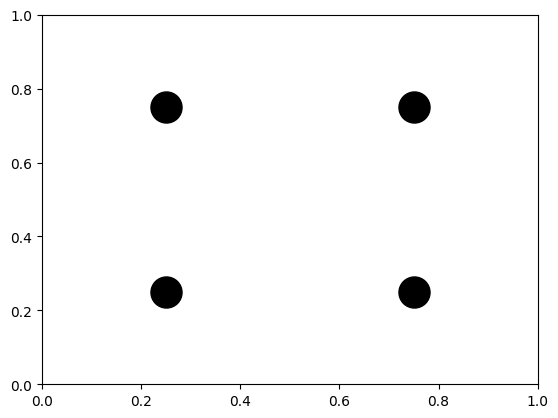

In [81]:
##  Visualize starting configuration  ##

for i in range(0,N):
    plt.scatter(x[i],y[i],c='k',marker='o',s=500)
plt.xlim(0,box)
plt.ylim(0,box)
plt.show()


In [82]:
###  Use this for Simple Pairwise Potential  ##

def force(x_all,y_all):

    en = 0
    c = -1/10
    rc = 0.75
    forces_x = [0.0]*N
    forces_y = [0.0]*N

    for i in range (0,N-1):
        for j in range (i+1,N):
            xr = x_all[i] - x_all[j]
            xr = xr - box*np.round(xr/box)
            yr = y_all[i] - y_all[j]
            yr = yr - box*np.round(yr/box)
            r = np.sqrt(xr*xr + yr*yr)
            if r <= rc:
                ff = c/(r*r)
                forces_x[i] = forces_x[i] + ff*(xr/r)
                forces_x[j] = forces_x[j] - ff*(xr/r)
                forces_y[i] = forces_y[i] + ff*(yr/r)
                forces_y[j] = forces_y[j] - ff*(yr/r)
                en = en + c/r

    return(en,forces_x,forces_y)


In [83]:
###  Use this for Calculating Average Pairwise Distances  ##

def pair_distance(x_all,y_all):

    k = 0
    dist_avg = 0

    for i in range (0,N-1):
        for j in range (i+1,N):
            xr = x_all[i] - x_all[j]
            xr = xr - box*np.round(xr/box)
            yr = y_all[i] - y_all[j]
            yr = yr - box*np.round(yr/box)
            r = np.sqrt(xr*xr + yr*yr)
            dist_avg = dist_avg + r
            k = k+1

    dist_avg = dist_avg/k

    return(dist_avg)


In [84]:
def init():

    x = [0.0]*N
    y = [0.0]*N
    xm = [0.0]*N
    ym = [0.0]*N

    vx = [0.0]*N
    vy = [0.0]*N
    sumv2 = 0
    dt = 0.01


    x[0] = 0.25*box
    x[1] = 0.25*box
    x[2] = 0.75*box
    x[3] = 0.75*box
    y[0] = 0.25*box
    y[1] = 0.75*box
    y[2] = 0.25*box
    y[3] = 0.75*box

    xm[0] = x[0] + (np.random.rand()-0.5)*0.01
    xm[1] = x[1] + (np.random.rand()-0.5)*0.01
    xm[2] = x[2] + (np.random.rand()-0.5)*0.01
    xm[3] = x[3] + (np.random.rand()-0.5)*0.01
    ym[0] = y[0] + (np.random.rand()-0.5)*0.01
    ym[1] = y[1] + (np.random.rand()-0.5)*0.01
    ym[2] = y[2] + (np.random.rand()-0.5)*0.01
    ym[3] = y[3] + (np.random.rand()-0.5)*0.01

    vx[0] = -1*(xm[0]-x[0])/dt
    vx[1] = -1*(xm[1]-x[1])/dt
    vx[2] = -1*(xm[2]-x[2])/dt
    vx[3] = -1*(xm[3]-x[3])/dt
    vy[0] = -1*(ym[0]-y[0])/dt
    vy[1] = -1*(ym[1]-y[1])/dt
    vy[2] = -1*(ym[2]-y[2])/dt
    vy[3] = -1*(ym[3]-y[3])/dt

    sumv2 = vx[0]*vx[0] + vy[0]*vy[0] + vx[1]*vx[1] + vy[1]*vy[1] + vx[2]*vx[2] + vy[2]*vy[2] + vx[3]*vx[3] + vy[3]*vy[3]

    PE_start, fx, fy = force(x,y)
    KE_start = 0.5*sumv2*m

    return(x, y, vx, vy, xm, ym, PE_start, KE_start)


In [85]:
x, y, vx, vy, xm, ym, PE_start, KE_start = init()

In [87]:
KE_start

8.916803564317821e-05

In [88]:
def integrate(en, forces_x, forces_y, x, xm, y, ym):

    sumv2 = 0
    vx = [0.0]*N
    vy = [0.0]*N

    for i in range(0,N):

        xr = x[i] - xm[i]
        xr = xr - box*np.round(xr/box)
        xx = x[i] + xr + dt*dt*forces_x[i]/m
        if xx >= 1.0:
          xx = xx - int(xx)
        if xx < 0.0:
          xx = xx - int(xx) + 1

        yr = y[i] - ym[i]
        yr = yr - box*np.round(yr/box)
        yy = y[i] + yr + dt*dt*forces_y[i]/m
        if yy >= 1.0:
          yy = yy - int(yy)
        if yy < 0.0:
          yy = yy - int(yy) + 1

        xr = xx - xm[i]
        xr = xr - box*np.round(xr/box)
        vx[i] = xr/(2*dt)
        yr = yy - ym[i]
        yr = yr - box*np.round(yr/box)
        vy[i] = yr/(2*dt)
        sumv2 = sumv2 + vx[i]*vx[i] + vy[i]*vy[i]
        xm[i] = x[i]
        x[i] = xx
        ym[i] = y[i]
        y[i] = yy

    Temp = sumv2/(3*N)
    pot = en
    kin = 0.5*sumv2*m
    etot = pot + kin

#    etot = (en + 0.5*sumv2)/N

    return(Temp, pot, kin, etot, x, y)



In [89]:
def sample(x,y):

    return(pair_distance(x,y))


In [90]:
def md(tmax,dt,nsamp):

    x, y, vx, vy, xm, ym, pe_start, ke_start = init()
    t = 0
    steps = round(tmax/dt)
    s = int(steps/nsamp)
    times = [0.0]*s
    PE = [0.0]*s
    KE = [0.0]*s
    TE = [0.0]*s
    Temp = [0.0]*s
    pair_dist = [0.0]*s

    x_new = x
    y_new = y
    k = 0

    for i in range(0,steps):
        en, fx, fy = force(x_new,y_new)
        T, pe, ke, te, x_new, y_new = integrate(en, fx, fy, x, xm, y, ym)
        t = t+dt
        if math.fmod(i, nsamp) == 0.0:
            k = int(i/nsamp)
            PE[k] = pe
            KE[k] = ke
            TE[k] = te
            Temp[k] = T
            times[k] = t
            pair_dist[k] = sample(x_new,y_new)

    plt.plot(times[:], PE[:], c = 'r')
    plt.plot(times[:], KE[:], c = 'b')
    plt.plot(times[:], TE[:], c = 'grey')
#    plt.plot(times[:], Temp[:], c='k')
#    plt.plot(times[:], pair_dist[:], c = 'g')

    return(PE, KE, TE, x_new, y_new, pair_dist)



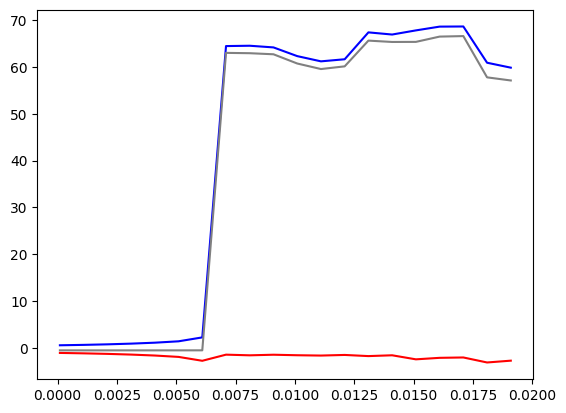

In [91]:

dt = 1e-4
tmax = 2e-2
nsamp = 10

PE, KE, TE, x_final, y_final, pair_dist = md(tmax,dt,nsamp)


In [92]:
force(x_final,y_final)

(-2.4306613282845415,
 [-4.692855320904699,
  -2.002459044200152,
  0.6424286197503233,
  6.052885745354527],
 [1.8710766986909806,
  -3.2704071777603914,
  -1.7162786949003546,
  3.1156091739697653])

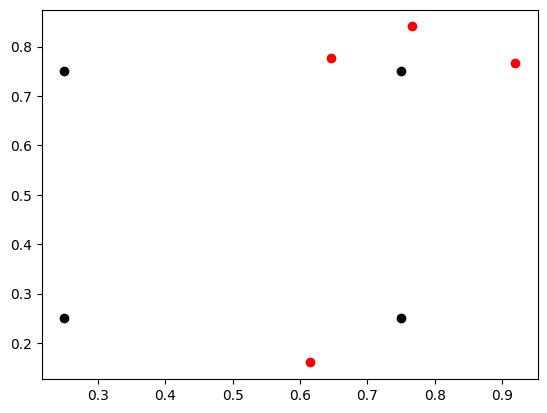

In [94]:
for i in range(0,N):
    plt.scatter(x_start[i],y_start[i],c='k')
    plt.scatter(x_final[i],y_final[i],c='r')
plt.show()


In [93]:
KE

[0.5506803624523162,
 0.6371495517649343,
 0.7515504615237376,
 0.901887779596533,
 1.1040911771999613,
 1.3982990800610597,
 2.2329944541473012,
 64.44459650116752,
 64.51616203070171,
 64.1599371166987,
 62.301308292369974,
 61.18403381211678,
 61.628692747124965,
 67.36969808746969,
 66.90980791280495,
 67.79249301315951,
 68.59931081599483,
 68.62993326400142,
 60.88828050094585,
 59.833718998996396]